In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загрузка данных
data = pd.read_parquet("data/train_ver2.parquet")

#### Изучение структуры датасета и проверка пропусков

In [3]:
data.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


Названия столбцов скорее всего написаны на испанском языке

In [4]:
# Размер датасета
data.shape

(13647309, 48)

In [5]:
# Количество пропусков столбцах датасета
data.isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

В данных много пропусков. В столбцах ult_fec_cli_1t(Последняя дата, когда клиент был премиальным) и conyuemp(1, если клиент супруг(а) работника) практически нет данных. В первом пропущенные значения означают отсутствие даты, можно было бы заполнить 0 пропуски, а даты заменить на 1, но эта информация есть в столбце indrel_1mes, значит можно удалить этот столбец. Со вторым столбцом нужно разобраться подробнее.

In [6]:
data.drop('ult_fec_cli_1t', axis=1, inplace=True)

In [7]:
data['conyuemp'].value_counts()

conyuemp
N    1791
S      17
Name: count, dtype: int64

N скорее всего испанское No, тогда S - Si. Если это так, то среди клиентов банка всего 17 супругов работников. Это слишком малая часть клиентов и от этих данных можно отказаться.

In [8]:
data.drop('conyuemp', axis=1, inplace=True)

Далее рассмотрю какие данные находятся в осталных столбцах с пропусками.

Во многих столбцах, содержащих пропуски, пропущенно одно и то же количество значений, а именно 27734. Нужно проверить строки с этими пропусками.

In [9]:
data[data['ind_empleado'].isna()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,2015-01-28,1050741,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775976,2015-06-28,550081,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776175,2015-06-28,550693,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776230,2015-06-28,549518,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776279,2015-06-28,549207,None,None,None,NA,None,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0


Все пропуски находятся а одних и тех же строках. Так как они не содержат ни какой информации и их количество невелико, то проще всего будет их удалить.

In [10]:
data = data[~data['ind_empleado'].isna()]

In [11]:
# Ещё раз проверю количество пропусков столбцах датасета
data.isna().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                   0
pais_residencia                0
sexo                          70
age                            0
fecha_alta                     0
ind_nuevo                      0
antiguedad                     0
indrel                         0
indrel_1mes               122047
tiprel_1mes               122047
indresi                        0
indext                         0
canal_entrada             158392
indfall                        0
tipodom                        1
cod_prov                   65857
nomprov                    65857
ind_actividad_cliente          0
renta                    2766641
segmento                  161634
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_fin_ult1              0
ind_ctop_fin_ult1              0
ind_ctpp_f

Ожидаемо, удалось разом избавиться от большого количества столбцов с пропусками.

In [12]:
# Статус занятости:
# - A — трудоустроен
# - B — безработный, раньше работал
# - F — иждивенец
# - N — безработный
# - P — пассивный (статус не определён)
data['ind_empleado'].value_counts()

ind_empleado
N    13610977
B        3566
F        2523
A        2492
S          17
Name: count, dtype: int64

В столбце есть неизвестная категория S. Скорее всего это должно быть P (статус не определён). Нужно заменить S на P.

In [13]:
data['ind_empleado'].replace({'S': 'P'}, inplace=True)

In [14]:
# Пол
# V - возможно, сокращение от Varón (мужчина)
# H - скорее всего, сокращение от Hembra (женщина)
data['sexo'].value_counts()

sexo
V    7424252
H    6195253
Name: count, dtype: int64

В этом столбце пропущенные данные можно заполнить наиболее рампространённым классом (V).

In [15]:
data['sexo'].fillna('V', inplace=True)

In [16]:
# Тип клиента в начале месяца:
# - 1 — премиальный
# - 2 — собственник
# - P — потенциальный
# - 3 — раньше был премиальным
# - 4 — раньше был собственником
data['indrel_1mes'].value_counts()

indrel_1mes
1.0    9133383
1      4357298
3.0       2780
3         1570
P          874
2.0        740
2          577
4.0        223
4           83
Name: count, dtype: int64

В данном столбце есть ошибка с записью классов, нужно заменить все float на int. Для пропущенных данных создам новый класс - N.

In [17]:
data['indrel_1mes'].replace({'1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}, inplace=True)
data['indrel_1mes'].fillna('N', inplace=True)
data['indrel_1mes'].value_counts()

indrel_1mes
1    13490681
N      122047
3        4350
2        1317
P         874
4         306
Name: count, dtype: int64

In [18]:
# Тип клиента в начале месяца:
# - A — активный
# - I — неактивный
# - P — бывший
# - R — потенциальный
data['tiprel_1mes'].value_counts()

tiprel_1mes
I    7304875
A    6187123
P       4656
R        870
N          4
Name: count, dtype: int64

В этом столбце изначально есть 4 значения с классом N, которого быть не должно. Поступлю с этим столбцом также как с предыдущим и пропускам присвою класс N.

In [19]:
data['tiprel_1mes'].fillna('N', inplace=True)

In [20]:
# Канал, по которому пришел пользователь
data['canal_entrada'].value_counts()

canal_entrada
KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KDI         17
025         11
KDL         11
KHS          5
KHR          1
Name: count, Length: 162, dtype: int64

В этом столбце 158392 пропуска. В наибольшем классе 4055270 значений. Если присвоить этот класс пропускам картина не сильно изменится.

In [21]:
data['canal_entrada'].fillna('KHE', inplace=True)

В столбце tipodom всего один пропуск. Его можно просто удалить.

In [22]:
data = data[~data['tipodom'].isna()]

In [23]:
# Код провинции (адреса клиента)
data['cod_prov'].value_counts()

cod_prov
28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
30.0     396759
29.0     367023
50.0     342543
3.0      313397
11.0     294684
36.0     280026
33.0     265749
47.0     238259
35.0     235700
6.0      192996
48.0     185888
45.0     183067
18.0     178562
37.0     164238
39.0     155706
14.0     144679
10.0     129912
7.0      124933
21.0     122283
13.0     119390
2.0      114128
12.0     104295
43.0     100115
9.0       97188
17.0      90538
31.0      88618
26.0      85202
27.0      84962
32.0      84009
24.0      83003
25.0      79059
20.0      71567
38.0      70968
19.0      64618
23.0      64363
4.0       60291
16.0      57310
49.0      50927
34.0      49282
40.0      42341
22.0      40181
5.0       38783
1.0       37704
44.0      22525
42.0      17660
52.0       9460
51.0       7218
Name: count, dtype: int64

В этом столбце 65856 пропусков, как и в столбце nomprov с названием провинции. Все пропуски в этих двух столбцах я заполню наиболее частым классом.

In [24]:
data['cod_prov'].fillna(28.0, inplace=True)

In [25]:
data['nomprov'].value_counts()

nomprov
MADRID                    4409600
BARCELONA                 1275219
VALENCIA                   682304
SEVILLA                    605164
CORUÑA, A                  429322
MURCIA                     396759
MALAGA                     367023
ZARAGOZA                   342543
ALICANTE                   313397
CADIZ                      294684
PONTEVEDRA                 280026
ASTURIAS                   265749
VALLADOLID                 238259
PALMAS, LAS                235700
BADAJOZ                    192996
BIZKAIA                    185888
TOLEDO                     183067
GRANADA                    178562
SALAMANCA                  164238
CANTABRIA                  155706
CORDOBA                    144679
CACERES                    129912
BALEARS, ILLES             124933
HUELVA                     122283
CIUDAD REAL                119390
ALBACETE                   114128
CASTELLON                  104295
TARRAGONA                  100115
BURGOS                      97188
GIRONA

In [26]:
data['nomprov'].fillna('MADRID', inplace=True)

In [27]:
# Доход домохозяйства
data['renta'].describe()

count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64

В этом столбце заполню пропуски медианным значением.

In [28]:
data['renta'].fillna(data['renta'].median(), inplace=True)

In [29]:
# Сегментация: 1 — VIP, 2 — Обыкновенные 3 — выпускники колледжей
data['segmento'].value_counts()

segmento
02 - PARTICULARES     7960219
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: count, dtype: int64

Заполню пропуски наиболее распространённым классом и переименую значения, убрав из них цифры.

In [30]:
data['segmento'].fillna('02 - PARTICULARES', inplace=True)
data['segmento'].replace({'01 - TOP': 'TOP', '02 - PARTICULARES': 'PARTICULARES', '03 - UNIVERSITARIO': 'UNIVERSITARIO'}, inplace=True)

В столбцах ind_nomina_ult1 и ind_nom_pens_ult1 по 217 пропусков. Удалю строки с этими пропусками.

In [31]:
data = data[~data['ind_nomina_ult1'].isna()]

In [32]:
# Финальная проверка на наличие пропусков
data.isna().sum().value_counts()

0    46
Name: count, dtype: int64

#### Проверка числовых столбцов на аномальные значения

In [33]:
data.select_dtypes(include=['int', 'number']).describe().T

,count,mean,std,min,25%,50%,75%,max
ncodpers,13619357.0,835081.208927,431577.782415,15889.00,452924.00,932182.0,1199355.00,1553689.00
ind_nuevo,13619357.0,0.059555,0.236660,0.00,0.00,0.0,0.00,1.00
indrel,13619357.0,1.178394,4.177418,1.00,1.00,1.0,1.00,99.00
tipodom,13619357.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00
cod_prov,13619357.0,26.578344,12.753490,1.00,15.00,28.0,34.00,52.00
ind_actividad_cliente,13619357.0,0.457806,0.498217,0.00,0.00,0.0,1.00,1.00
renta,13619357.0,127671.270142,206280.819230,1202.73,76365.15,101850.0,137625.75,28894395.51
ind_ahor_fin_ult1,13619357.0,0.000103,0.010124,0.00,0.00,0.0,0.00,1.00
ind_aval_fin_ult1,13619357.0,0.000023,0.004817,0.00,0.00,0.0,0.00,1.00
ind_cco_fin_ult1,13619357.0,0.656282,0.474948,0.00,0.00,1.0,1.00,1.00


Все данные в порядке, кроме столбца tipodom, в котором все значения 1. Этот столбец я удалю. Помимо этого нужно проверить столбец renta с доходами домохозяйства.

In [34]:
data.drop('tipodom', axis=1, inplace=True)

In [35]:
q = data['renta'].quantile(0.97)
q

345394.19280000194

In [36]:
# избавлюсь от аномально больших значений
data = data[data['renta'] < q]

In [37]:
data['age'].dtype

dtype('O')

В столбце с возрастом клиента данные записаны как строки. Нужно привести их к типу int.

In [38]:
data['age'] = data['age'].astype(int)

In [39]:
data['antiguedad'].dtype

dtype('O')

Со столбцом antiguedad возникла такая же проблема.

In [40]:
data['antiguedad'] = data['antiguedad'].astype(int)

### Проверка зависимостей и переодичности в данных

Тепловая карта корреляций числовых признаков

<Axes: >

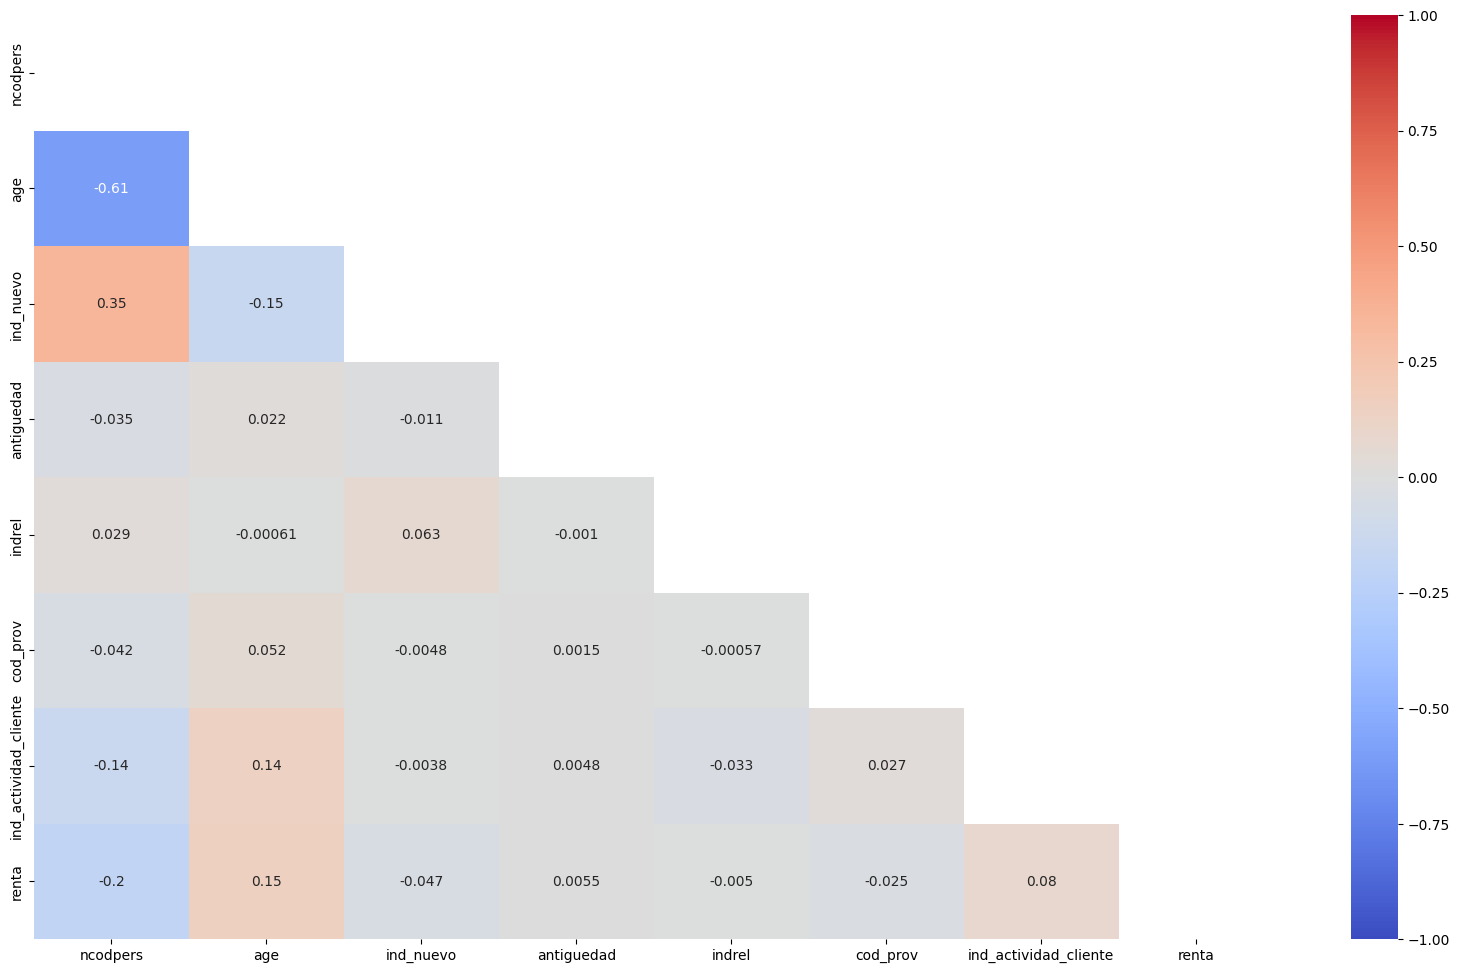

In [41]:
features = data[['ncodpers', 'age',	'ind_nuevo', 'antiguedad', 'indrel', 'cod_prov', 'ind_actividad_cliente', 'renta']]

upp_mat = np.triu(features.corr())

f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(features.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", mask=upp_mat)

Корреляции не обнаружено.

Проверю баланс классов в бинарных признаках.

In [42]:
data.select_dtypes(include=['object'])

,fecha_dato,ind_empleado,pais_residencia,sexo,fecha_alta,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,nomprov,segmento
0,2015-01-28,N,ES,H,2015-01-12,1,A,S,N,KHL,N,MALAGA,PARTICULARES
1,2015-01-28,N,ES,V,2012-08-10,1,I,S,S,KHE,N,CIUDAD REAL,UNIVERSITARIO
2,2015-01-28,N,ES,V,2012-08-10,1,I,S,N,KHE,N,CIUDAD REAL,UNIVERSITARIO
3,2015-01-28,N,ES,H,2012-08-10,1,I,S,N,KHD,N,ZARAGOZA,UNIVERSITARIO
4,2015-01-28,N,ES,V,2012-08-10,1,A,S,N,KHE,N,ZARAGOZA,UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,N,ES,V,2013-08-14,1,I,S,N,KHE,N,ZARAGOZA,UNIVERSITARIO
13647305,2016-05-28,N,ES,V,2013-08-14,1,I,S,N,KHE,N,"RIOJA, LA",UNIVERSITARIO
13647306,2016-05-28,N,ES,H,2013-08-14,1,A,S,N,KHE,N,ZARAGOZA,PARTICULARES
13647307,2016-05-28,N,ES,H,2013-08-14,1,I,S,N,KHE,N,ZARAGOZA,UNIVERSITARIO


Пора заменить тип данных в столбцах с датами.

In [43]:
data['fecha_dato'] = pd.to_datetime(data['fecha_dato'], format='%Y-%m-%d')
data['fecha_alta'] = pd.to_datetime(data['fecha_alta'], format='%Y-%m-%d')

In [44]:
# столбцы с бинарными признаками
data.select_dtypes(include=['object']).nunique() == 2

ind_empleado       False
pais_residencia    False
sexo                True
indrel_1mes        False
tiprel_1mes        False
indresi             True
indext              True
canal_entrada      False
indfall             True
nomprov            False
segmento           False
dtype: bool

<Axes: >

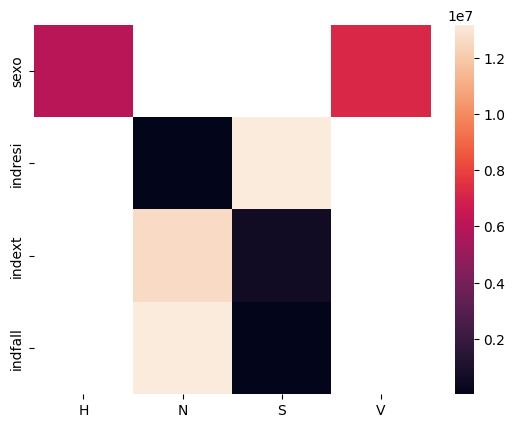

In [45]:
# Тепловая карта бинарных признаков
binary_columns = ['sexo', 'indresi', 'indext', 'indfall']

heat_df = data[binary_columns].apply(pd.Series.value_counts).T
sns.heatmap(heat_df)

Во всех признаках кроме пола наблюдается сильный дисбаланс. В будущем нужно будет подумать использовать их или нет.

Проверю как распределены взаимодействия по датам.

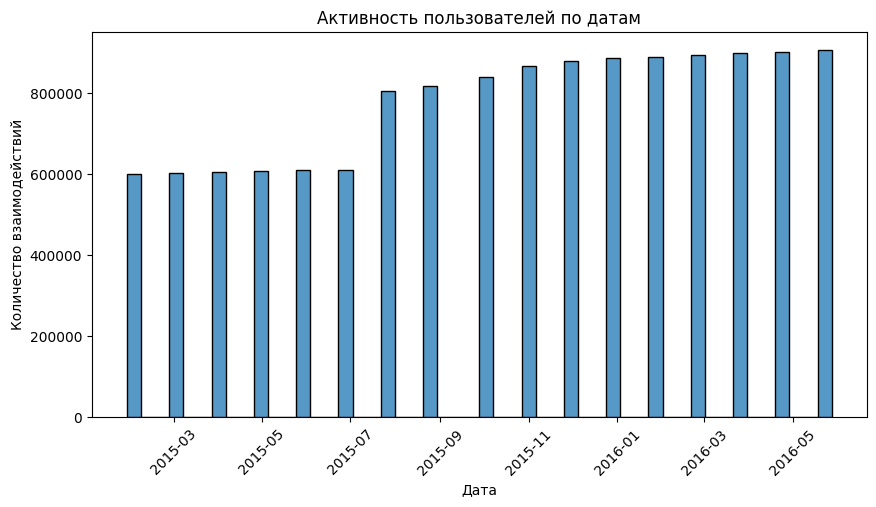

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(data['fecha_dato'], bins=50)

plt.xlabel("Дата")
plt.ylabel("Количество взаимодействий")
plt.title("Активность пользователей по датам")
plt.xticks(rotation=45) 

plt.show()

Столбец fecha_dato - это колонка для разделения таблицы. Я так понимаю что это нужно для разделения на train и test, так что график будет полезен.

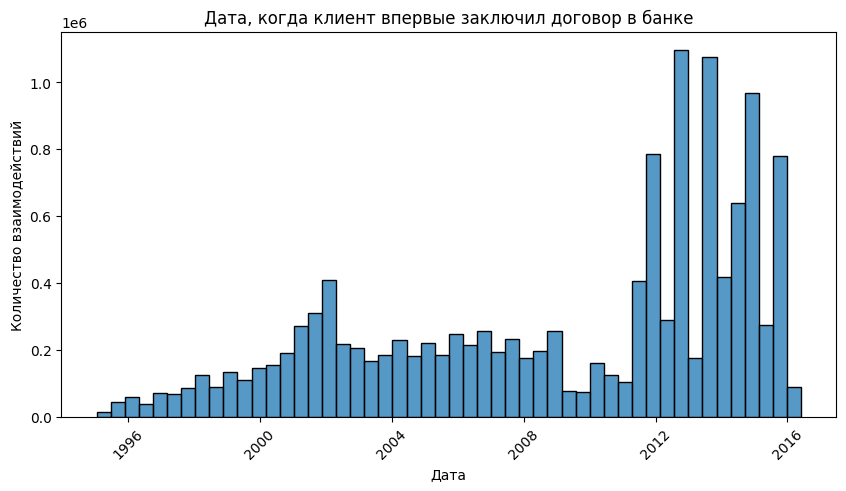

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(data['fecha_alta'], bins=50)

plt.xlabel("Дата")
plt.ylabel("Количество взаимодействий")
plt.title("Дата, когда клиент впервые заключил договор в банке")
plt.xticks(rotation=45) 

plt.show()

Много клиентов стало приходить в банк примерно после 2011 года. Пока не очень понятно будет ли от этих данных польза. Нужно будет поэкспериментировать.